In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import plot_leverage_resid2

%matplotlib inline

## Chapter 3 - Linear Regression

Linear regression is a simple approach to supervised learning. It assumes that the dependence of $Y$ on $X_1,X_2\dots,X_p$is linear. It is used to predict quantitative response. 

**True regression functions are never linear!**

Tt may seem overly simplistic, linear regression is extremely useful both conceptually and practically.

Questions we might ask of the advertising data;

+ Is there a relationship between advertising budget and sales?
+ How strong is the relationship between advertising budget and sales?
+ Which media contribute to sales?
+ How accurately can we predict future sales?
+ Is the relationship linear?
+ Is there synergy among the advertising media?

### Simple Linear Regression using a single predictor $X$.

Assume a model;

$$ Y = \beta_0 +  \beta_1 X + \epsilon$$

where $\beta_0$ and $\beta_1$ are two unknown constants that we need to estimate, the **intercept** $\beta_0$ and the **slope**, $\beta_1$. $\epsilon$ is the error term. 

These can also be called coefficients or parameters. We use the following notation once we have fit the model;

$$ \hat{Y} = \hat{\beta_0} +  \hat{\beta_1} X$$

### Estimation of the parameters by least squares

Let $\hat{y}_i = \hat{\beta_0} +  \hat{\beta_1}x_i$ be the prediction for $Y$ based on the $i$-th
value of $X$. Then $e_i = y_i - \hat{y}_i$ represents the $i$-th residual.

We define the residual sum of squares (RSS) as

$$RSS = e_1^2+ e_2^2 + \dots + e_n^2$$

or equivalently as

The least squares approach chooses $\hat{\beta_0}$ and $\hat{\beta_1}x_1)^2$ to minimize the RSS. 

The minimizing values can be shown to be;

$$\hat{\beta_1} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$\hat{\beta_0} = \bar{y} - \beta_1\bar{x}$$

where $\bar{y}$ and $\bar{x}$ are sample means.

In [2]:
advertising = pd.read_csv('data/Advertising.csv')

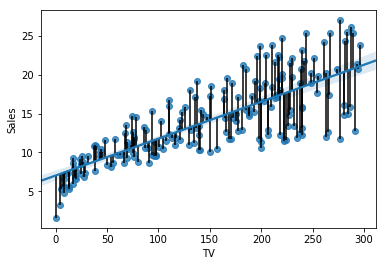

In [4]:
fit = np.polyfit(advertising.TV, advertising.Sales, deg=1)
y_hat = fit[1] + advertising.TV * fit[0]

sns.regplot('TV', 'Sales', data=advertising)
plt.vlines(advertising.TV, y_hat, advertising.Sales);

The least squares fit for the regression of sales onto TV. In this case a linear fit captures the essence of the relationship, although it is somewhat deficient in the left of the plot.

### Assessing the Accuracy of the Coefficient Estimates

The model given defines the population regression line, which is the best linear approximation to the true relationship between $X$ and $Y$. The *least squares regression* coefficient estimates characterize the least squares line.

To estimate the accuracy of a single estimated value, it is helpful to calculate the **standard error** of the estimated value $\hat{\mu}$;

$$Var(\hat{\mu})=SE(\hat{\mu})^2=\frac{\sigma^2}{n}$$

The standard error describes the average amount that the estimate differs from actual value. This value increases as the number of observations $n$ increase.

The standard error associated with $\beta_0$ and $\beta_1$ are as follows;

$$SE(\beta_0)^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n(x_i-\bar{x})^2)}]$$

$$SE(\beta_1)^2 = \frac{\sigma^2}{\sum_{i=1}^n(x_i-\bar{x})^2}$$

where the error $\epsilon$ is not correlated with $\sigma^2$

We usually don't know $\sigma^2$, but it can be estimated from the data using the **residual standard error*;

$$RSE = \sqrt{\frac{RSS}{(n-2)}}$$

### Confidence intervals of estimators
With the standard error (assuming the errors are Gaussian) we can generate a confidence interval.

A confidence interval is a range of values such that with a certain likelihood the range will contain the true unknown value of the parameter.

The 95% confidence interval for $\beta_0$ and $\beta_1$ can be approximated;

$$\hat{\beta_1} \pm 2SE(\hat{\beta_1})$$

$$\hat{\beta_0} \pm 2SE(\hat{\beta_0})$$

### Standard Error and Hypothesis Testing

Hypothesis test involve a null hypothesis, that is usually that there is no relationship.

$$H_0: \beta_1 = 0 $$

and it is tested against the alternative

$$H_a: \beta_1 \ne 0 $$

We want to determine whether the estimates are sufficiently far from zero to provide confidence that $\beta_1$ is non-zero.

test this we find out how many standard errors our parameter is away from 0. $\frac{\hat{\beta_1}}{SE(\hat{\beta_1})}$

A **T-statistic**, measures the number of standard deviations that $\hat{\beta_1}$ is away from 0. This can be used when determining if an estimate is sufficiently significant to reject the null hypothesis.

$$t = \frac{\hat{\beta_1}-0}{SE(\hat{\beta_1})$$

We can then use a t-distribution to determine the percentage of time that we expect a value  beyond this t-statistic. 

This probability is the **p-value** and it measures how extreme the results are. A smaller  p-value indicates a result that probably did not come from randomness.

# Accuracy of the Model

We usually assess the quality of a linear regression model using the **residual standard error (RSE)** and the $R^2$ statistic.

The residual standard error is an estimate of the standard deviation of $\epsilon$, it measure the lack of fit. The RSE is small when the fit is good.

The $R^2$ measures the proportions of variance explained by the model. 

$$ R^{2} = \frac{\mathrm{TSS}-\mathrm{RSS}}{\mathrm{TSS}} = 1 - \frac{\mathrm{RSS}}{\mathrm{TSS}} $$

where

$$ \mathrm{RSS} = \sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2}$$

and

$$ \mathrm{TSS} = \sum_{i=1}^{n}(y_{i} - \bar{y}_{i})^{2}$$

TSS measures the total variance in the response $Y$, this can be thought of as the total variability in the response before linear regression.

Another measure of the relationship is **correlation**;

$$ Cor(X,Y) = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}\sqrt{\sum_{i=1}^{n}(y_{i}-\bar{y})^{2}}} $$

### Multiple Linear Regression
    What if we want to use multiple predictors?

$$ \hat{y} = \hat{\beta_{0}} + \hat{\beta_{1}}x_{1} + \hat{\beta_{2}}x_{2} + \dots + \hat{\beta_{p}}x_{p} $$

We can again minimize the RSS to estimate the coefficients;

$$ RSS = \sum_{i=1}^{n}(y_{i} - \hat{y}{i})^{2} = \sum{i=1}^{n}(y_{i} - \hat{\beta_{0}} - \hat{\beta_{1}}x_{1} - \hat{\beta_{2}}x_{2} - \ldots - \hat{\beta_{p}}x_{p})^{2} $$

When $$ n $$ is large, an F-statistic slightly greater than $$ 1 $$ can be evidence to reject the null hypothesis. However if $$ n $$ is small, a large F-statistic is needed to reject the null hypothesis.

### Is There a Relationship Between the Response and Predictors?
**Multiple Linear Regression Accuracy**

An F test is performed to test for significance when dealing with a null hypothesis relating to multiple coefficients.

$$ F = \frac{(TSS - RSS)/p}{RSS / (n - p - 1)}$$

So, when there is no relationship between the response and the predictors the F-statisitic takes on a value close to 1, if the alternative hypothesis is true, then the F-statistic will take on a value greater than 1.

When the null hypothesis is true and the errors have a normal distribution, the F-statistic follows and F-distribution. With this we can calculate a p-value for the given $n$. We can use the p-value to decide whether or not to reject the null hypothesis.

The F-statistic works best when $p$ is relatively small compared to $n$.

When $p > n$, multiple linear regression using least squares will not work, and therefore, the F-statistic cannot be used.

### Deciding on Important Variables

The process of removing predictors that do not relate to the response is called **variable selection**.

**Ways to perform variable selection**

**Forward selection:** We begin with the null model—a model that contains an intercept but no predictors. We then fit $p$ simple linear regressions and add to the null model the variable that results in the lowest RSS. We then add to that model the variable that results in the lowest RSS for the new two-variable model. This approach is continued until some stopping rule is satisfied.

**Backward selection:** We start with all variables in the model, and remove the variable with the largest p-value—that is, the variable that is the least statistically significant. The new $(p − 1)$-variable model is fit, and the variable with the largest p-value is removed. This procedure continues until a stopping rule is reached. For instance, we may stop when all remaining variables have a p-value below some threshold.

**Mixed selection:** This is a combination of forward and backward selection. We start with no variables in the model, and as with forward selection, we add the variable that provides the best fit. We continue to add variables one-by-one. Of course, as we noted with the Advertising example, the p-values for variables can become larger as new predictors are added to the model. Hence, if at any point the p-value for one of the variables in the model rises above a certain threshold, then we remove that variable from the model. We continue to perform these forward and backward steps until all variables in the model have a sufficiently low p-value, and all variables outside the model would have a large p-value if added to the model.

### Model Fit

An $R^2$ close to 1 indicates that the model explains a large portion of the variance in the response variable. 

*Note:* The $R^2$ value will always increase when more variables are added to the model, even when those variables are only weakly related to the response.

The **Residual Standard Error (RSE)** can also be used to assess the fit of a multiple linear regression model;

$$ RSE = \sqrt{\frac{\mathrm{RSS}}{n - p - 1}} $$

### Qualitative predictors

**Predictors with Only Two Levels**

When a qualitative predictor has only two possible levels, it can be incorporated into the model by creating an indicator variable or dummy variable that takes on only two numerical values;

\begin{equation}
  X=\left\{
  \begin{array}{@{}ll@{}}
    1, & \text{if}\ p_i = A \\
    0, & \text{if}\ p_i = B
  \end{array}\right.
\end{equation} 

and use this variable as a predictor in the regression equation. This results in the model;

\begin{equation}
  y_i = \beta_0 + \beta_1 X_i + \epsilon_i=\left\{
  \begin{array}{@{}ll@{}}
    \beta_0+\beta_1+\epsilon_i, & \text{if}\ p_i = A \\
    \beta_0+\epsilon_i, & \text{if}\ p_i = B
  \end{array}\right.
\end{equation} 

where $\beta_{1}$ represents the average difference in $X_{1}$ between classes $A$ and $B$.

We could also use a **dummy variable**;

\begin{equation}
  X=\left\{
  \begin{array}{@{}ll@{}}
    1, & \text{if}\ p_i = A \\
    -1, & \text{if}\ p_i = B
  \end{array}\right.
\end{equation} 

The model then becomes;

\begin{equation}
  y_i = \beta_0 + \beta_1 X_i + \epsilon_i=\left\{
  \begin{array}{@{}ll@{}}
    \beta_0+\beta_1+\epsilon_i, & \text{if}\ p_i = A \\
    \beta_0-\beta_1+\epsilon_i, & \text{if}\ p_i = B
  \end{array}\right.
\end{equation} 


So now $\beta_0$ is the overall average and $\beta_1$ is the amount that $A$ appears above the average and $B$ below the average.

The predictions will be equivalent using either coding.

### Predictors with More than Two Levels

When we have more than two levels, we must use multiple dummy variables.

\begin{equation}
  X_{i1}=\left\{
  \begin{array}{@{}ll@{}}
    1, & \text{if}\ p_i = A \\
    0, & \text{if}\ p_i \neq A
  \end{array}\right.
\end{equation} 

\begin{equation}
  X_{i2}=\left\{
  \begin{array}{@{}ll@{}}
    1, & \text{if}\ p_i = B \\
    0, & \text{if}\ p_i \neq B
  \end{array}\right.
\end{equation} 

**I've decided on taking notes on the book using pen and paper or flashcard and using the notebooks only for the lab and exercises.**

***I am also assuming the people viewing this would rather see my solutions to the books problems than my notes.***

### Lab: Linear Regression

In [34]:
boston = pd.read_csv('data/boston.csv')

The `statsmodels` package provides much of the functionality from R's `lm()` function.

We can fit the model, view the $R^2R, confidence interval and coefficient/intercept values

In [35]:
results = smf.ols('medv ~ lstat', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 02 May 2018   Prob (F-statistic):           5.08e-88
Time:                        17:09:58   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000        33.448    35.659
lstat         -0.9500      0.039    -24.528      0.000        -1.026    -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
results.conf_int()

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


We can use the `statmodels` api to get predicted $y$ values and plot them against the scatter of our predictor and target values.

In [43]:
#y_hat = results.predict(exog=dict(lstat=boston.lstat))
#don't need this, just learned about results.fittedvalues

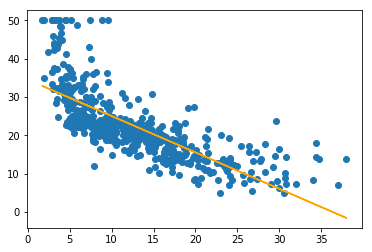

In [42]:
plt.scatter(boston.lstat, boston.medv)
plt.plot(boston.lstat, results.fittedvalues, c='orange');

Next, we want to pplot the residuals against the fitted values.

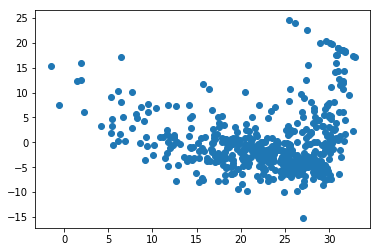

In [44]:
plt.scatter(results.fittedvalues, results.resid);

On the basis of the residual plots, there is some evidence of non-linearity.

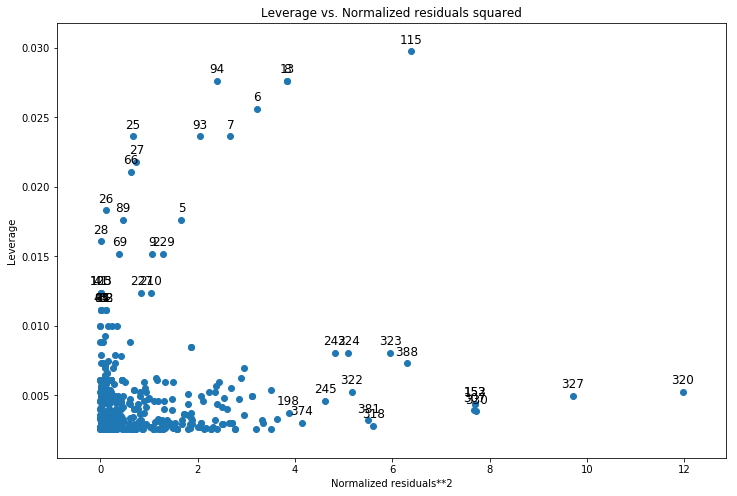

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
fig = plot_leverage_resid2(results, ax=ax)

### Multiple Linear Regression

In [51]:
results = smf.ols('medv ~ lstat + age', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 02 May 2018   Prob (F-statistic):           2.98e-88
Time:                        17:21:35   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000        31.787    34.659
lstat         -1.0321      0.048    -21.416      0.000        -1.127    -0.937
age            0.0345      0.012      2.826      0.005         0.011     0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is no easy way to fit all columns using smf.ols, it looks like this would be easier with SciKit learn, but I'll work around the limiation of statsmodel here because the output really matches the book.

In [55]:
features = ' + '.join(boston.columns[:-1])
results = smf.ols('medv ~ {}'.format(features), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 02 May 2018   Prob (F-statistic):          6.72e-135
Time:                        17:23:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000        26.432    46.487
crim          -0.1080      0.033     -3.287      0.001        -0.173    -0.043
zn             0.0464      0.014      3.382      0.001         0.019     0.073
indus          0.0206      0.061      0.334      0.738        -0.100     0.141
chas           2.6867      0.862      3.118      0.002         0.994     4.380
nox          -17.7666      3.820     -4.651      0.000       -25.272   -10.262
rm             3.8099      0.418      9.116      0.000         2.989     4.631
age            0.0007      0.013      0.052      0.958        -0.025     0.027
dis           -1.4756      0.199     -7.398      0.000        -1.867    -1.084
rad            0.3060      0.066      4.613      0.000         0.176     0.436
tax           -0.0123      0.004     -3.280      0.001        -0.020    -0.005
ptratio       -0.9527      0.131     -7.283      0.000        -1.210    -0.696
black          0.0093      0.003      3.467      0.001         0.004     0.015
lstat         -0.5248      0.051    -10.347      0.000        -0.624    -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For example, in the above regression output, age has a high p-value. So we may wish to run a regression excluding this predictor.

In [59]:
no_age = features.replace('+ age ', '')
results = smf.ols('medv ~ {}'.format(no_age), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Wed, 02 May 2018   Prob (F-statistic):          6.08e-136
Time:                        17:26:45   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000        26.456    46.418
crim          -0.1080      0.033     -3.290      0.001        -0.173    -0.043
zn             0.0463      0.014      3.404      0.001         0.020     0.073
indus          0.0206      0.061      0.335      0.738        -0.100     0.141
chas           2.6890      0.860      3.128      0.002         1.000     4.378
nox          -17.7135      3.679     -4.814      0.000       -24.943   -10.484
rm             3.8144      0.408      9.338      0.000         3.012     4.617
dis           -1.4786      0.191     -7.757      0.000        -1.853    -1.104
rad            0.3058      0.066      4.627      0.000         0.176     0.436
tax           -0.0123      0.004     -3.283      0.001        -0.020    -0.005
ptratio       -0.9522      0.130     -7.308      0.000        -1.208    -0.696
black          0.0093      0.003      3.481      0.001         0.004     0.015
lstat         -0.5239      0.048    -10.999      0.000        -0.617    -0.430
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interaction Terms

It is easy to include interaction terms;

In [60]:
results = smf.ols('medv ~ lstat * age', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 02 May 2018   Prob (F-statistic):           4.86e-88
Time:                        17:26:45   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000        33.201    38.976
lstat         -1.3921      0.167     -8.313      0.000        -1.721    -1.063
age           -0.0007      0.020     -0.036      0.971        -0.040     0.038
lstat:age      0.0042      0.002      2.244      0.025         0.001     0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Non-linear Transformations of the Predictors

There are fairly simple too, we add in the transformed term using regular python math syntax.

In [62]:
# Interaction
results = smf.ols('medv ~ lstat + lstat**2', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 02 May 2018   Prob (F-statistic):           5.08e-88
Time:                        17:28:28   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000        33.448    35.659
lstat         -0.9500      0.039    -24.528      0.000        -1.026    -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The near-zero p-value associated with the quadratic term suggests that it leads to an improved model. We use the anova() function to further `anova()` quantify the extent to which the quadratic fit is superior to the linear fit.

In [78]:
from statsmodels.stats.anova import anova_lm

In [79]:
lm1 = smf.ols('medv ~ lstat', data=boston).fit()
lm2 = smf.ols('medv ~ lstat + lstat**2', data=boston).fit()

table1 = anova_lm(lm1, lm2)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [80]:
print(table1)

   df_resid           ssr  df_diff  ss_diff   F  Pr(>F)
0     504.0  19472.381418      0.0      NaN NaN     NaN
1     504.0  19472.381418     -0.0     -0.0 NaN     NaN


Here Model 1 represents the linear submodel containing only one predictor, lstat, while Model 2 corresponds to the larger quadratic model that has two predictors, lstat and lstat2. The anova() function performs a hypothesis test comparing the two models. The null hypothesis is that the two models fit the data equally well, and the alternative hypothesis is that the full model is superior. Here the F-statistic is 135 and the associated p-value is virtually zero. This provides very clear evidence that the model containing the predictors lstat and lstat2 is far superior to the model that only contains the predictor lstat.

We can see that when the lstat2 term is included in the model, there is little discernible pattern in the residuals.

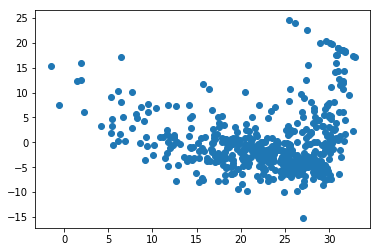

In [82]:
plt.scatter(lm2.fittedvalues, lm2.resid);

In order to create a cubic fit, we can include a predictor of the form `lstat**3`. However, this approach can start to get cumbersome for higher order polynomials. I couldn't find an easy way to do this in `statmodels`, so I moved to SciKit Learn.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

model = make_pipeline(PolynomialFeatures(5), LinearRegression())
model.fit(boston.lstat.values.reshape(-1, 1), boston.medv)

### Qualitative Predictors

We will now examine the Carseats data, which is part of the ISLR library. We will attempt to predict Sales (child car seat sales) in 400 locations based on a number of predictors.

In [88]:
carseats = pd.read_csv('data/carseats.csv')
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


Given a qualitative variable such as `Shelveloc`, `statsmodel` generates dummy variables automatically.

Below we fit a multiple regression model that includes some interaction terms.

In [91]:
features = ' + '.join(carseats.columns[:-1])
features = string_cols + ' + Income : Advertising + Price:Age'
results = smf.ols('Sales ~ {}'.format(features), data=carseats).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.691e+29
Date:                Wed, 02 May 2018   Prob (F-statistic):               0.00
Time:                        18:33:48   Log-Likelihood:                 11800.
No. Observations:                 400   AIC:                        -2.357e+04
Df Residuals:                     386   BIC:                        -2.352e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept           -7.194e-14      4e-14     -1.800      0.073     -1.51e-13  6.64e-15
ShelveLoc[T.Good]    6.661e-15   1.09e-14      0.610      0.542     -1.48e-14  2.81e-14
ShelveLoc[T.Medium]  8.826e-15   6.03e-15      1.463      0.144     -3.04e-15  2.07e-14
Urban[T.Yes]         1.443e-15   4.24e-15      0.340      0.734     -6.89e-15  9.78e-15
Sales                   1.0000   1.91e-15   5.23e+14      0.000         1.000     1.000
CompPrice            1.214e-16   2.36e-16      0.515      0.607     -3.42e-16  5.85e-16
Income              -1.223e-16   9.99e-17     -1.224      0.222     -3.19e-16  7.41e-17
Advertising         -4.163e-16   7.96e-16     -0.523      0.601     -1.98e-15  1.15e-15
Population           1.536e-16   1.36e-17     11.261      0.000      1.27e-16   1.8e-16
Price                2.082e-17    3.4e-16      0.061      0.951     -6.48e-16   6.9e-16
Age                  7.355e-16    6.1e-16      1.205      0.229     -4.65e-16  1.94e-15
Education           -1.388e-16   7.36e-16     -0.189      0.851     -1.59e-15  1.31e-15
Income:Advertising  -4.727e-17   1.06e-17     -4.472      0.000     -6.81e-17 -2.65e-17
Price:Age           -2.982e-18   5.02e-18     -0.594      0.553     -1.29e-17  6.89e-18
==============================================================================
Omnibus:                        7.107   Durbin-Watson:                   1.515
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                7.299
Skew:                           0.326   Prob(JB):                       0.0260
Kurtosis:                       2.890   Cond. No.                     1.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
results = smf.ols('Sales ~ C(ShelveLoc)', data=carseats).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     92.23
Date:                Wed, 02 May 2018   Prob (F-statistic):           1.27e-33
Time:                        18:30:46   Log-Likelihood:                -906.03
No. Observations:                 400   AIC:                             1818.
Df Residuals:                     397   BIC:                             1830.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  5.5229      0.239     23.131      0.000         5.054     5.992
C(ShelveLoc)[T.Good]       4.6911      0.348     13.464      0.000         4.006     5.376
C(ShelveLoc)[T.Medium]     1.7837      0.286      6.229      0.000         1.221     2.347
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.092
Skew:                           0.033   Prob(JB):                        0.955
Kurtosis:                       2.966   Cond. No.                         4.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exercises
### Conceptual

**1.** TV, Radio, and Newpaper each have a null hypothesis of having no relationship to sales given the other variables are constant. We can use the p-value to reject the null hypotheses for TV and Radio but we fail to reject the null hypotheses for Newspaper advertising.

**2.** The KNN classifier uses the frequency of a category among the neighbors to predict a label, while KNN regression use the mean of the nearest K neighbors to predict a value for the observation.

**3a.** *iii*, males need a 3.5 GPA to overcome the female advatage in the model.
**3b.** 137.1 
**3c.** False, we use the standard error of the coefficient to determine significance, not the size of the coefficient.

**4a.** As we add predictors to a model, the training RSS will decrease, so we expect the cubic model to have the lower RSS.

**4b.** Since the actual relationship is linear, the test RSS should be lower for the linear regression.

**4c.** The cubic model should always have the lowest training RSS.

**4d.** Without knowing the relationship, it is tough to say. If it was still fairly close to linear, we could probably expect the linear model to have a lower test RSS, but the further it gets from linear, the more we might expect the cubic model to have lower test RSS.

**5.** Sub $\hat{\beta}$ from the second equation into for $\hat{y_i}=x_i\hat{\beta}$;

$$\hat{y_i} = \frac{x_i\sum\limits_{k=1}^n x_k y_k}{\sum\limits_{j=1}^nx_j^2}$$

Distribute the constant $x_i$;

$$\hat{y_i} = \sum\limits_{k=1}^n (\frac{x_i x_k}{\sum\limits_{j=1}^nx_j^2})y_k$$

It follows;

$$\hat{y_i} = \sum\limits_{k=1}^n (\frac{x_i x_k}{\sum\limits_{j=1}^nx_j^2})y_k=\sum_{i=1}^n a_iy_i$$

where $a_i=\sum\limits_{k=1}^n (\frac{x_i x_k}{\sum\limits_{j=1}^nx_j^2})$

**6.** Sub $\bar{x}$ for $x$ in the linear question, knowing $\hat{\beta_0} = \bar{y}-\hat{\beta_1}\bar{x}$;

$y=\hat{\beta_0} + \hat{\beta_1}\bar{x}=\bar{y}-\hat{\beta_1}\bar{x}+\hat{\beta_1}\bar{x}=\bar{y}$

**7.** Did not want to struggle to write out of the LaTex, so I used paper.

### Applied

In [2]:
#8a
auto = pd.read_csv('data/auto.csv')

In [5]:
results = smf.ols('mpg ~ horsepower', data=auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 02 May 2018   Prob (F-statistic):           7.03e-81
Time:                        20:45:30   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000        38.525    41.347
horsepower    -0.1578      0.006    -24.489      0.000        -0.171    -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**8ai.** The low F-statistic p-value indicates there is a strong relationship

**8aii** Almost 60% of the variability in mpg can be explained by horsepower

**8aiii** The coeficient of horsepower is negative, therefore the relationship is also negative.

**8aiv** 24.46 mpg for a car with 98 horsepower, confidence intervals in the next cell. 

In [9]:
results.conf_int()

,0,1
Intercept,38.525212,41.346510
horsepower,-0.170517,-0.145172


In [68]:
results.params['Intercept'] + results.params['horsepower'] * 98

24.467077152512438

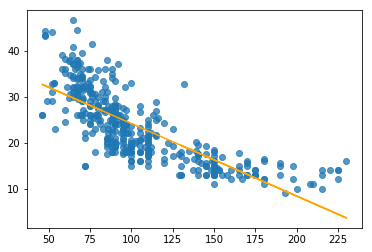

In [13]:
#8b
plt.scatter(auto.horsepower, auto.mpg, alpha=0.75)
plt.plot(auto.horsepower, results.fittedvalues, c='orange');

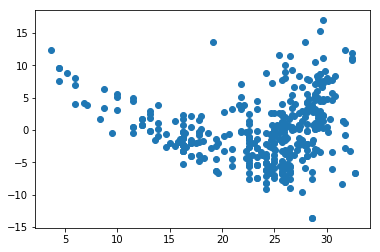

In [14]:
#8c start with residuals vs fitted values
plt.scatter(results.fittedvalues, results.resid);

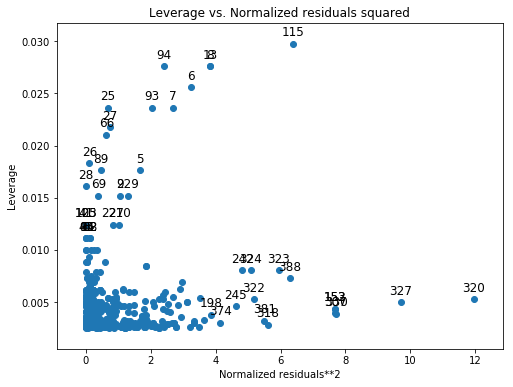

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

We can see that there is non-linearity in the data. The normalized residuals versus leverage indicates the presence of a few high leverage points.

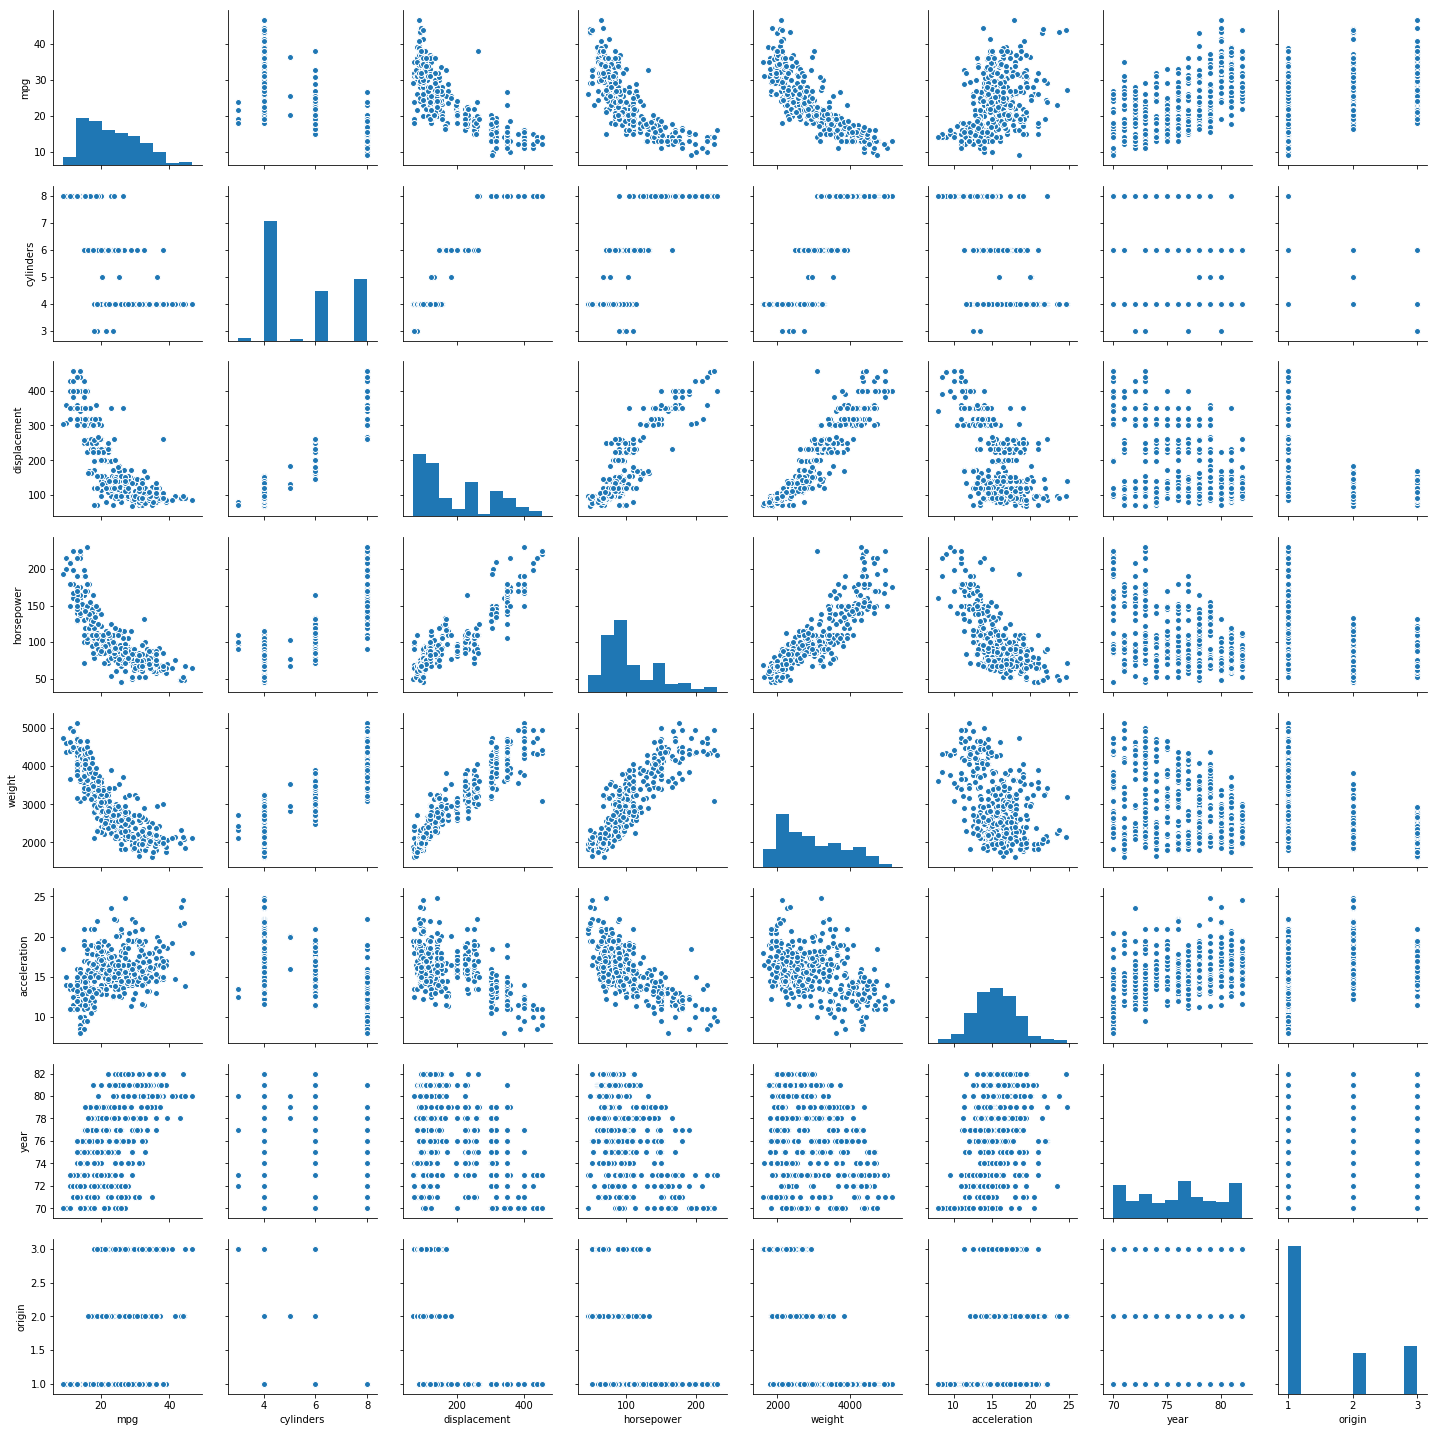

In [19]:
#9a scatterplot matrix
sns.pairplot(auto);

In [20]:
#9b matrix of correlations
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [24]:
features = ' + '.join(auto.columns[1:])
no_name = features.replace(' + name', '')
no_name

'cylinders + displacement + horsepower + weight + acceleration + year + origin'

In [26]:
results = smf.ols('mpg ~ {}'.format(no_name), data=auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 02 May 2018   Prob (F-statistic):          2.04e-139
Time:                        21:05:41   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000       -26.350    -8.087
cylinders       -0.4934      0.323     -1.526      0.128        -1.129     0.142
displacement     0.0199      0.008      2.647      0.008         0.005     0.035
horsepower      -0.0170      0.014     -1.230      0.220        -0.044     0.010
weight          -0.0065      0.001     -9.929      0.000        -0.008    -0.005
acceleration     0.0806      0.099      0.815      0.415        -0.114     0.275
year             0.7508      0.051     14.729      0.000         0.651     0.851
origin           1.4261      0.278      5.127      0.000         0.879     1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**9ci.** The F-statistic indicates a clear relationship between the predictors and response variable.

**9cii.** Using the p-values for each predictor, only cylinders, horsepower, and acceleration are not significant. 

**9ciii.** We are improving the mpg of a car each year.    

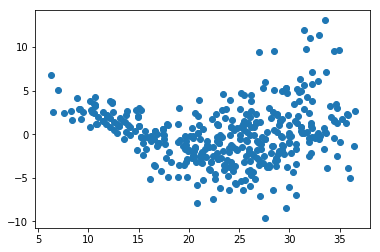

In [30]:
#diagnostic plots
plt.scatter(results.fittedvalues, results.resid);

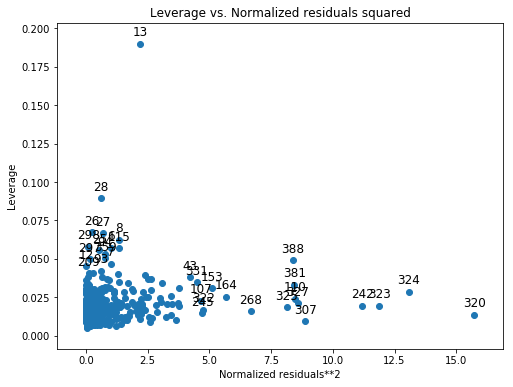

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

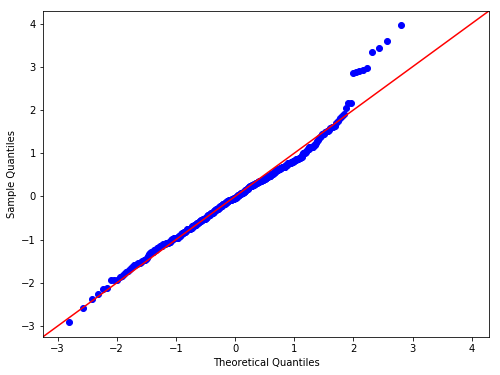

In [32]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.qqplot(results.resid / np.sqrt((results.resid ** 2).sum() / 390), line='45', ax=ax)

**9d.** The plot indicate non-linearity in the data, but not a lot. It looks like the data also has one high leverage point. The qqplot great for most values, but it there are some outliear in the right tail.

In [33]:
from itertools import combinations #want to find all combinations of iteracting terms

In [38]:
features = ' + '.join(auto.columns[1:-1])

In [39]:
interactions =  " + ".join([comb[0] + ":" + comb[1] for comb in combinations(auto.columns[1:-1], 2)])
features_inter = features + " + " + interactions

features_inter

'cylinders + displacement + horsepower + weight + acceleration + year + origin + cylinders:displacement + cylinders:horsepower + cylinders:weight + cylinders:acceleration + cylinders:year + cylinders:origin + displacement:horsepower + displacement:weight + displacement:acceleration + displacement:year + displacement:origin + horsepower:weight + horsepower:acceleration + horsepower:year + horsepower:origin + weight:acceleration + weight:year + weight:origin + acceleration:year + acceleration:origin + year:origin'

In [40]:
results = smf.ols('mpg ~ {}'.format(features_inter), data=auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Wed, 02 May 2018   Prob (F-statistic):          4.01e-155
Time:                        21:25:02   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                    35.4789     53.136      0.668      0.505       -69.014   139.972
cylinders                     6.9886      8.248      0.847      0.397        -9.231    23.208
displacement                 -0.4785      0.189     -2.527      0.012        -0.851    -0.106
horsepower                    0.5034      0.347      1.451      0.148        -0.179     1.186
weight                        0.0041      0.018      0.235      0.814        -0.030     0.039
acceleration                 -5.8592      2.174     -2.696      0.007       -10.134    -1.585
year                          0.6974      0.610      1.144      0.253        -0.501     1.896
origin                      -20.8956      7.097     -2.944      0.003       -34.852    -6.939
cylinders:displacement       -0.0034      0.006     -0.524      0.601        -0.016     0.009
cylinders:horsepower          0.0116      0.024      0.480      0.632        -0.036     0.059
cylinders:weight              0.0004      0.001      0.399      0.690        -0.001     0.002
cylinders:acceleration        0.2779      0.166      1.670      0.096        -0.049     0.605
cylinders:year               -0.1741      0.097     -1.793      0.074        -0.365     0.017
cylinders:origin              0.4022      0.493      0.816      0.415        -0.567     1.371
displacement:horsepower   -8.491e-05      0.000     -0.294      0.769        -0.001     0.000
displacement:weight        2.472e-05   1.47e-05      1.682      0.093     -4.18e-06  5.36e-05
displacement:acceleration    -0.0035      0.003     -1.041      0.299        -0.010     0.003
displacement:year             0.0059      0.002      2.482      0.014         0.001     0.011
displacement:origin           0.0240      0.019      1.232      0.219        -0.014     0.062
horsepower:weight         -1.968e-05   2.92e-05     -0.673      0.501     -7.72e-05  3.78e-05
horsepower:acceleration      -0.0072      0.004     -1.939      0.053        -0.015     0.000
horsepower:year              -0.0058      0.004     -1.482      0.139        -0.014     0.002
horsepower:origin             0.0022      0.029      0.076      0.939        -0.055     0.060
weight:acceleration           0.0002      0.000      1.025      0.306        -0.000     0.001
weight:year                  -0.0002      0.000     -1.056      0.292        -0.001     0.000
weight:origin                -0.0006      0.002     -0.364      0.716        -0.004     0.003
acceleration:year             0.0556      0.026      2.174      0.030         0.005     0.106
acceleration:origin           0.4583      0.157      2.926      0.004         0.150     0.766
year:origin                   0.1393      0.074      1.882      0.061        -0.006     0.285
===========================================================================

The terms cylinders:year, displacement:year, horsepower:acceleration all come close to being significant, but are not below the 0.05 threshold, only acceleration:year and acceleration:origin are significant.

In [41]:
#10 
carseats = pd.read_csv('data/carseats.csv')

In [42]:
#a Fit a multiple regression model to predict Sales using Price, Urban, and US.
results = smf.ols('Sales ~ Price + Urban + US', data=carseats).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 02 May 2018   Prob (F-statistic):           2.39e-23
Time:                        21:28:40   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000        11.764    14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936        -0.556     0.512
US[T.Yes]        1.2006      0.259      4.635      0.000         0.691     1.710
Price           -0.0545      0.005    -10.389      0.000        -0.065    -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

If we increase price by 1 dollar there is a decrease of 54.45 units sold. 

On average the unit sales in urban locations are 21.92 units less than in rural locations.

On average the unit sales in US stores are 1200.57 units more than in a non-US stores.

Ubran does not seem to statistical significant.

**10c.** $\text{sales} = 13.043 - 0.054*\text{price} - 0.021*\text{urban} + 1.2*\text{US} + \epsilon$

**10d.** We can reject the null for Price and US.

In [43]:
#10e
results = smf.ols('Sales ~ Price + US', data=carseats).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 02 May 2018   Prob (F-statistic):           2.66e-24
Time:                        21:35:43   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000        11.790    14.271
US[T.Yes]      1.1996      0.258      4.641      0.000         0.692     1.708
Price         -0.0545      0.005    -10.416      0.000        -0.065    -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**10f.** The $R^2$ for the second model is slightly higher, but neither model explain more than 24% of the variability in the data.

In [44]:
#10g
results.conf_int()

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


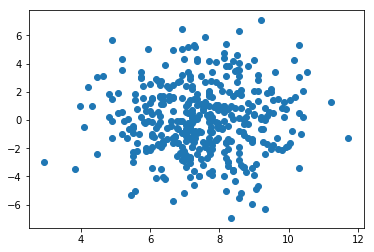

In [45]:
plt.scatter(results.fittedvalues, results.resid);

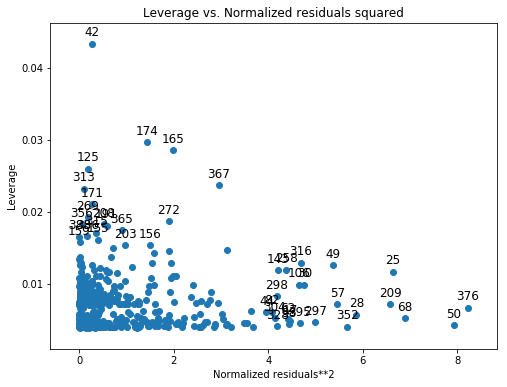

In [46]:
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

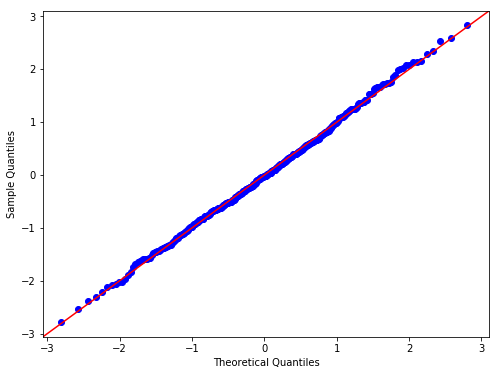

In [47]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.qqplot(results.resid / np.sqrt((results.resid ** 2).sum() / 390), line='45', ax=ax)

Not too many outliers and only a few high leverage points, with one being very high.

In [50]:
np.random.seed(42)
x = np.random.randn(100)
y = 2 * x + np.random.randn(100)
problem_11 = pd.DataFrame({'x':x, 'y':y})

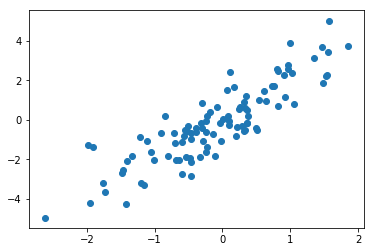

In [51]:
plt.scatter(x, y);

In [53]:
#11a
results = smf.ols('y ~x -1', data=problem_11).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     319.2
Date:                Wed, 02 May 2018   Prob (F-statistic):           9.67e-33
Time:                        21:42:20   Log-Likelihood:                -135.71
No. Observations:                 100   AIC:                             273.4
Df Residuals:                      99   BIC:                             276.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x              1.8558      0.104     17.866      0.000         1.650     2.062
==============================================================================
Omnibus:                        1.947   Durbin-Watson:                   2.195
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.907
Skew:                           0.327   Prob(JB):                        0.385
Kurtosis:                       2.828   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The small p-value would allow us to reject the null hypothesis.

In [55]:
#11b
results = smf.ols('x ~ y -1', data=problem_11).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     319.2
Date:                Wed, 02 May 2018   Prob (F-statistic):           9.67e-33
Time:                        21:43:25   Log-Likelihood:                -60.372
No. Observations:                 100   AIC:                             122.7
Df Residuals:                      99   BIC:                             125.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
y              0.4113      0.023     17.866      0.000         0.366     0.457
==============================================================================
Omnibus:                        6.469   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                5.876
Skew:                          -0.546   Prob(JB):                       0.0530
Kurtosis:                       3.468   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Same results as the first model.

**11c.** The same values for the t-statistic and p-value are in the results, indicating these models plot the same line.

**11d.** Too much Latex, worked through on paper.

**11e.** With regards to $x$ and $y$ the equation is identical because we are contantly multiplying the terms.

In [57]:
#11f
results = smf.ols('y ~ x', data=problem_11).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     312.2
Date:                Wed, 02 May 2018   Prob (F-statistic):           3.14e-32
Time:                        21:47:40   Log-Likelihood:                -135.71
No. Observations:                 100   AIC:                             275.4
Df Residuals:                      98   BIC:                             280.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0074      0.096      0.078      0.938        -0.182     0.197
x              1.8567      0.105     17.669      0.000         1.648     2.065
==============================================================================
Omnibus:                        1.950   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.909
Skew:                           0.327   Prob(JB):                        0.385
Kurtosis:                       2.829   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
results = smf.ols('x ~ y', data=problem_11).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     312.2
Date:                Wed, 02 May 2018   Prob (F-statistic):           3.14e-32
Time:                        21:47:52   Log-Likelihood:                -60.176
No. Observations:                 100   AIC:                             124.4
Df Residuals:                      98   BIC:                             129.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0279      0.045     -0.621      0.536        -0.117     0.061
y              0.4099      0.023     17.669      0.000         0.364     0.456
==============================================================================
Omnibus:                        6.532   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                5.943
Skew:                          -0.548   Prob(JB):                       0.0512
Kurtosis:                       3.474   Cond. No.                         1.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**12a.** If $\sum{y^2} = \sum{x^2}$  (equal sum of sqaures of the values are equal), the the coefficient estimate for the regression for $X$ on to $Y$ is the same as $Y$ on to $X$.

In [12]:
#12b
x = np.random.randn(100)
y = 4.0*x #sum of sqaures will not match

In [13]:
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.598e+33
Date:                Thu, 03 May 2018   Prob (F-statistic):               0.00
Time:                        03:24:43   Log-Likelihood:                 3358.7
No. Observations:                 100   AIC:                            -6715.
Df Residuals:                      99   BIC:                            -6713.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             4.0000   6.67e-17      6e+16      0.000         4.000     4.000
==============================================================================
Omnibus:                        2.333   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.311   Jarque-Bera (JB):                2.020
Skew:                           0.027   Prob(JB):                        0.364
Kurtosis:                       3.694   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
results = sm.OLS(x, y).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.598e+33
Date:                Thu, 03 May 2018   Prob (F-statistic):               0.00
Time:                        03:24:45   Log-Likelihood:                 3497.4
No. Observations:                 100   AIC:                            -6993.
Df Residuals:                      99   BIC:                            -6990.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.2500   4.17e-18      6e+16      0.000         0.250     0.250
==============================================================================
Omnibus:                        2.333   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.311   Jarque-Bera (JB):                2.020
Skew:                           0.027   Prob(JB):                        0.364
Kurtosis:                       3.694   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
x = np.random.randn(100) * 5
y = np.random.permutation(x)

In [18]:
results = sm.OLS(x, y).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1107
Date:                Thu, 03 May 2018   Prob (F-statistic):              0.740
Time:                        03:26:09   Log-Likelihood:                -302.04
No. Observations:                 100   AIC:                             606.1
Df Residuals:                      99   BIC:                             608.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0334      0.100     -0.333      0.740        -0.233     0.166
==============================================================================
Omnibus:                        0.322   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.851   Jarque-Bera (JB):                0.494
Skew:                           0.038   Prob(JB):                        0.781
Kurtosis:                       2.664   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1107
Date:                Thu, 03 May 2018   Prob (F-statistic):              0.740
Time:                        03:26:10   Log-Likelihood:                -302.04
No. Observations:                 100   AIC:                             606.1
Df Residuals:                      99   BIC:                             608.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0334      0.100     -0.333      0.740        -0.233     0.166
==============================================================================
Omnibus:                        0.378   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.828   Jarque-Bera (JB):                0.544
Skew:                           0.076   Prob(JB):                        0.762
Kurtosis:                       2.672   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
(x**2).sum() == (y**2).sum() 

True

This matches up with our answer from 12a.

In [23]:
#13a
x = np.random.normal(size=100)
 # b0 = -1 and b1 = .5

In [24]:
#13b
eps = np.random.normal(0, 0.25, 100)

In [25]:
#13c 
y = -1 + 0.5 * x + eps
len(y)

100

**13c.** The length of $y$ is 100 and in the model $\beta_0=-1$ and $\beta_1=0.5$.

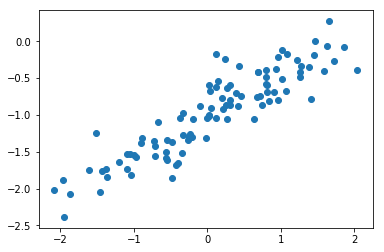

In [26]:
#13d
plt.scatter(x, y);

There is an obvious positive linear relationship with a bit of noise.

In [40]:
#13e least square fit of the model
problem_13 = pd.DataFrame({'x': x, 'y':y})
results_og = smf.ols('y ~ x', data=problem_13).fit()
results_og.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 03 May 2018   Prob (F-statistic):           1.33e-17
Time:                        03:43:18   Log-Likelihood:                -70.594
No. Observations:                 100   AIC:                             145.2
Df Residuals:                      98   BIC:                             150.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.0903      0.050    -21.929      0.000        -1.189    -0.992
x              0.5154      0.049     10.442      0.000         0.417     0.613
==============================================================================
Omnibus:                        1.344   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.511   Jarque-Bera (JB):                0.828
Skew:                          -0.062   Prob(JB):                        0.661
Kurtosis:                       3.429   Cond. No.                         1.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model's values for $\beta_0$ and $\beta_1$ are *very* close to the actual model we created.

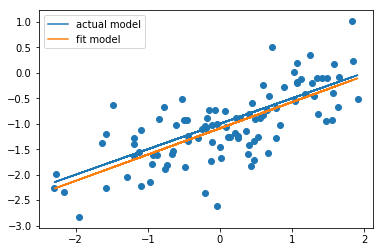

In [41]:
y_no_noise = -1 + .5 * x
plt.scatter(x, y)
plt.plot(x, y_no_noise, label ='actual model')
plt.plot(x, results.fittedvalues, label = 'fit model')
plt.legend();

In [42]:
#13g
problem_13['x2'] = problem_13['x']**2
results_og_2 = smf.ols('y ~ x + x2', data=problem_13).fit()
results_og_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     56.70
Date:                Thu, 03 May 2018   Prob (F-statistic):           4.91e-17
Time:                        03:43:20   Log-Likelihood:                -69.276
No. Observations:                 100   AIC:                             144.6
Df Residuals:                      97   BIC:                             152.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.1585      0.065    -17.819      0.000        -1.288    -1.029
x              0.5219      0.049     10.623      0.000         0.424     0.619
x2             0.0666      0.041      1.610      0.111        -0.016     0.149
==============================================================================
Omnibus:                        0.753   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.686   Jarque-Bera (JB):                0.341
Skew:                          -0.085   Prob(JB):                        0.843
Kurtosis:                       3.230   Cond. No.                         2.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the $x^2$ term is not signifigant, but there is a small increase in $R^2$, this tends to happen when fitting a more complex model though.

In [33]:
#13h
x = np.random.normal(size=100)
eps = np.random.normal(0, 0.125, 100) #lower noise
y = -1 + 0.5 * x + eps

In [37]:
problem_13h = pd.DataFrame({'x': x, 'y':y})
results_less_eps = smf.ols('y ~ x', data=problem_13h).fit()
results_less_eps.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 03 May 2018   Prob (F-statistic):           1.33e-17
Time:                        03:42:46   Log-Likelihood:                -70.594
No. Observations:                 100   AIC:                             145.2
Df Residuals:                      98   BIC:                             150.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.0903      0.050    -21.929      0.000        -1.189    -0.992
x              0.5154      0.049     10.442      0.000         0.417     0.613
==============================================================================
Omnibus:                        1.344   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.511   Jarque-Bera (JB):                0.828
Skew:                          -0.062   Prob(JB):                        0.661
Kurtosis:                       3.429   Cond. No.                         1.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
x = np.random.normal(size=100)
eps = np.random.normal(0, 0.5, 100) #raise noise
y = -1 + 0.5 * x + eps

In [38]:
problem_13h = pd.DataFrame({'x': x, 'y':y})
results_more_eps = smf.ols('y ~ x', data=problem_13h).fit()
results_more_eps.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 03 May 2018   Prob (F-statistic):           1.33e-17
Time:                        03:42:55   Log-Likelihood:                -70.594
No. Observations:                 100   AIC:                             145.2
Df Residuals:                      98   BIC:                             150.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.0903      0.050    -21.929      0.000        -1.189    -0.992
x              0.5154      0.049     10.442      0.000         0.417     0.613
==============================================================================
Omnibus:                        1.344   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.511   Jarque-Bera (JB):                0.828
Skew:                          -0.062   Prob(JB):                        0.661
Kurtosis:                       3.429   Cond. No.                         1.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see (as expected) that when there is less noise, our model will fit the data more closely.

In [47]:
print('Original Model:', results_og.conf_int())
print('')
print('Less Noise Model:', results_less_eps.conf_int())
print('')
print('More Noise Model:', results_more_eps.conf_int())

Original Model:                   0         1
Intercept -1.188972 -0.991639
x          0.417449  0.613348

Less Noise Model:                   0         1
Intercept -1.188972 -0.991639
x          0.417449  0.613348

More Noise Model:                   0         1
Intercept -1.188972 -0.991639
x          0.417449  0.613348


In [48]:
np.random.seed(42)
x1 = np.random.rand(100)
x2 = .5 * x1 + np.random.rand(100) / 10
y = 2 + 2 * x1 + .3 * x2 + np.random.randn(100)

**14.a**
$$Y = 2 + 2X_1 + 0.3X_2 + \epsilon$$
$$\beta_0 = 2$, $\beta_1=2$, $\beta_3=0.3$$

In [51]:
np.corrcoef(x1, x2)[0][1]

0.9809052604450199

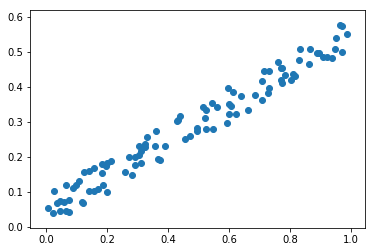

In [50]:
plt.scatter(x1, x2);

In [53]:
problem_14 = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2})
results = smf.ols('y ~ x1 + x2', data=problem_14).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     16.73
Date:                Thu, 03 May 2018   Prob (F-statistic):           5.71e-07
Time:                        03:49:55   Log-Likelihood:                -139.10
No. Observations:                 100   AIC:                             284.2
Df Residuals:                      97   BIC:                             292.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.9106      0.254      7.516      0.000         1.406     2.415
x1            -1.9383      1.715     -1.130      0.261        -5.342     1.466
x2             7.4931      3.388      2.212      0.029         0.770    14.216
==============================================================================
Omnibus:                        6.139   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                5.737
Skew:                           0.456   Prob(JB):                       0.0568
Kurtosis:                       3.738   Cond. No.                         44.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**14c.** The regression coefficients are very close to the actual coefficients.

We can reject the null hypothesis for $\beta_1$ because its p-value is below 0.05. However, we cannot reject the null hypothesis for $\beta_2$. 

In [54]:
#14d
results = smf.ols('y ~ x1', data=problem_14).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     27.48
Date:                Thu, 03 May 2018   Prob (F-statistic):           9.12e-07
Time:                        03:51:28   Log-Likelihood:                -141.56
No. Observations:                 100   AIC:                             287.1
Df Residuals:                      98   BIC:                             292.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.2955      0.189     12.147      0.000         1.920     2.670
x1             1.7831      0.340      5.242      0.000         1.108     2.458
==============================================================================
Omnibus:                        8.426   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.694
Skew:                           0.541   Prob(JB):                       0.0129
Kurtosis:                       3.956   Cond. No.                         4.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**14d** We can reject still the null hypothesis for $\beta_1$

In [55]:
#14e
results = smf.ols('y ~ x2', data=problem_14).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     32.10
Date:                Thu, 03 May 2018   Prob (F-statistic):           1.47e-07
Time:                        03:51:41   Log-Likelihood:                -139.75
No. Observations:                 100   AIC:                             283.5
Df Residuals:                      98   BIC:                             288.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.0690      0.212      9.742      0.000         1.648     2.490
x2             3.7380      0.660      5.666      0.000         2.429     5.047
==============================================================================
Omnibus:                        7.839   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.916
Skew:                           0.518   Prob(JB):                       0.0191
Kurtosis:                       3.908   Cond. No.                         7.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**14e** We can now reject the null hypothesis for $\beta_2$

**14f.** Due to the collinearity of $x_1$ and $x_2$ it is very difficult to distinguish their effects from each other. Their linear relationship with y become clear when they are used alone.

In [56]:
#14g
mistake_x1 = np.append(x1, .1)
mistake_x2 = np.append(x2, .8)
mistake_y = np.append(y, 6)

In [57]:
mistake_14 =  pd.DataFrame({'y':mistake_y, 'x1':mistake_x1, 'x2':mistake_x2})

In [59]:
np.corrcoef(mistake_x1, mistake_x2)[0][1]

0.8810572110461249

In [64]:
results = smf.ols('y ~ x1 + x2', data=mistake_14).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     20.80
Date:                Thu, 03 May 2018   Prob (F-statistic):           2.95e-08
Time:                        04:00:01   Log-Likelihood:                -140.22
No. Observations:                 101   AIC:                             286.4
Df Residuals:                      98   BIC:                             294.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.0098      0.205      9.784      0.000         1.602     2.417
x1            -0.8957      0.698     -1.284      0.202        -2.281     0.489
x2             5.4154      1.314      4.121      0.000         2.808     8.023
==============================================================================
Omnibus:                        7.317   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.245
Skew:                           0.496   Prob(JB):                       0.0267
Kurtosis:                       3.859   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
results = smf.ols('y ~ x1', data=mistake_14).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     21.20
Date:                Thu, 03 May 2018   Prob (F-statistic):           1.23e-05
Time:                        04:00:08   Log-Likelihood:                -148.29
No. Observations:                 101   AIC:                             300.6
Df Residuals:                      99   BIC:                             305.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.3981      0.197     12.192      0.000         2.008     2.788
x1             1.6379      0.356      4.604      0.000         0.932     2.344
==============================================================================
Omnibus:                       12.394   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.251
Skew:                           0.695   Prob(JB):                     0.000805
Kurtosis:                       4.207   Cond. No.                         4.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
results = smf.ols('y ~ x2', data=mistake_14).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     39.70
Date:                Thu, 03 May 2018   Prob (F-statistic):           8.25e-09
Time:                        04:00:16   Log-Likelihood:                -141.06
No. Observations:                 101   AIC:                             286.1
Df Residuals:                      99   BIC:                             291.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.0229      0.206      9.828      0.000         1.614     2.431
x2             3.9292      0.624      6.300      0.000         2.692     5.167
==============================================================================
Omnibus:                        7.814   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.937
Skew:                           0.511   Prob(JB):                       0.0189
Kurtosis:                       3.918   Cond. No.                         6.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For our original model $x_1$ is now statistically insignificance while $x_2$ is no longer statistiscal significance.
Each are still signifigant when fit on their own.

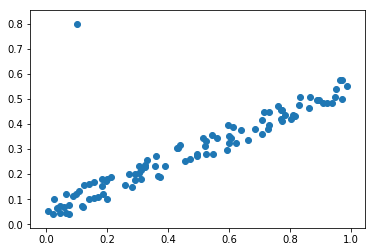

In [68]:
plt.scatter(mistake_x1, mistake_x2);

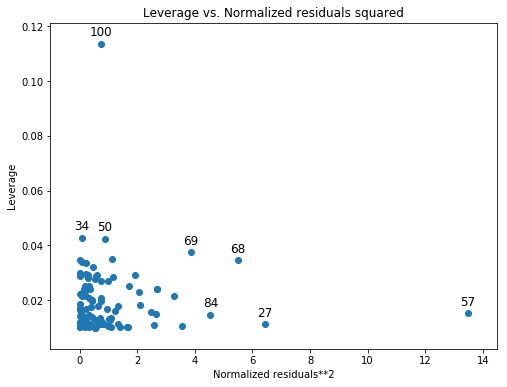

In [69]:
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

The new point is both an outlier and a very high leverage point, as expected.

In [90]:
results.params[1]

0.04485521467003109

In [83]:
# a) simple linear regression for each predictor
boston = pd.read_csv('data/boston.csv')

In [91]:
coef = {}
for col in boston.columns[1:]:
    form = 'crim ~ ' + col
    results = smf.ols(form, data=boston).fit()
    print('Can we reject the null for ' + col +'?')
    print(results.pvalues[1] < 0.05)
    coef[col] = [results.params[1]]

Can we reject the null for zn?
True
Can we reject the null for indus?
True
Can we reject the null for chas?
False
Can we reject the null for nox?
True
Can we reject the null for rm?
True
Can we reject the null for age?
True
Can we reject the null for dis?
True
Can we reject the null for rad?
True
Can we reject the null for tax?
True
Can we reject the null for ptratio?
True
Can we reject the null for black?
True
Can we reject the null for lstat?
True
Can we reject the null for medv?
True


`chas` is the only variable we **cannot** reject the null hypothesis for.

In [98]:
form = 'crim ~ ' + ' + '.join(boston.columns[1:])

In [99]:
results_multi = smf.ols(form, data=boston).fit()
results_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Thu, 03 May 2018   Prob (F-statistic):           1.57e-56
Time:                        04:12:16   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.019         2.818    31.248
zn             0.0449      0.019      2.394      0.017         0.008     0.082
indus         -0.0639      0.083     -0.766      0.444        -0.228     0.100
chas          -0.7491      1.180     -0.635      0.526        -3.068     1.570
nox          -10.3135      5.276     -1.955      0.051       -20.679     0.052
rm             0.4301      0.613      0.702      0.483        -0.774     1.634
age            0.0015      0.018      0.081      0.935        -0.034     0.037
dis           -0.9872      0.282     -3.503      0.001        -1.541    -0.433
rad            0.5882      0.088      6.680      0.000         0.415     0.761
tax           -0.0038      0.005     -0.733      0.464        -0.014     0.006
ptratio       -0.2711      0.186     -1.454      0.147        -0.637     0.095
black         -0.0075      0.004     -2.052      0.041        -0.015    -0.000
lstat          0.1262      0.076      1.667      0.096        -0.023     0.275
medv          -0.1989      0.061     -3.287      0.001        -0.318    -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
coef

{'age': [0.10778622713953308],
 'black': [-0.03627964056733074],
 'chas': [-1.8927765508037608],
 'dis': [-1.5509016824100994],
 'indus': [0.5097763311042313],
 'lstat': [0.5488047820623981],
 'medv': [-0.3631599222576031],
 'nox': [31.248531201122926],
 'ptratio': [1.1519827870705868],
 'rad': [0.6179109273272013],
 'rm': [-2.6840512241139467],
 'tax': [0.029742252822765353],
 'zn': [-0.07393497740412348]}

In [112]:
for i,val in zip(results_multi.params.index[1:], results_multi.params.values[1:]):
    coef[i].append(val)

In [117]:
coefs = pd.DataFrame(coef).T #0 is the uni

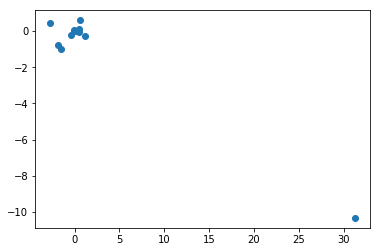

In [123]:
plt.scatter(coefs[0], coefs[1])

There is a big change for `nox` in the univariate vs multiple version of linear regression.